#LeetCode question 69. Sqrt(x)
- Data structure and algorithm
- Related topics: math, binary search
- problem url: https://leetcode.com/problems/sqrtx/
- solution 2: using binary search
- creation date: Monday, July 8, 2024

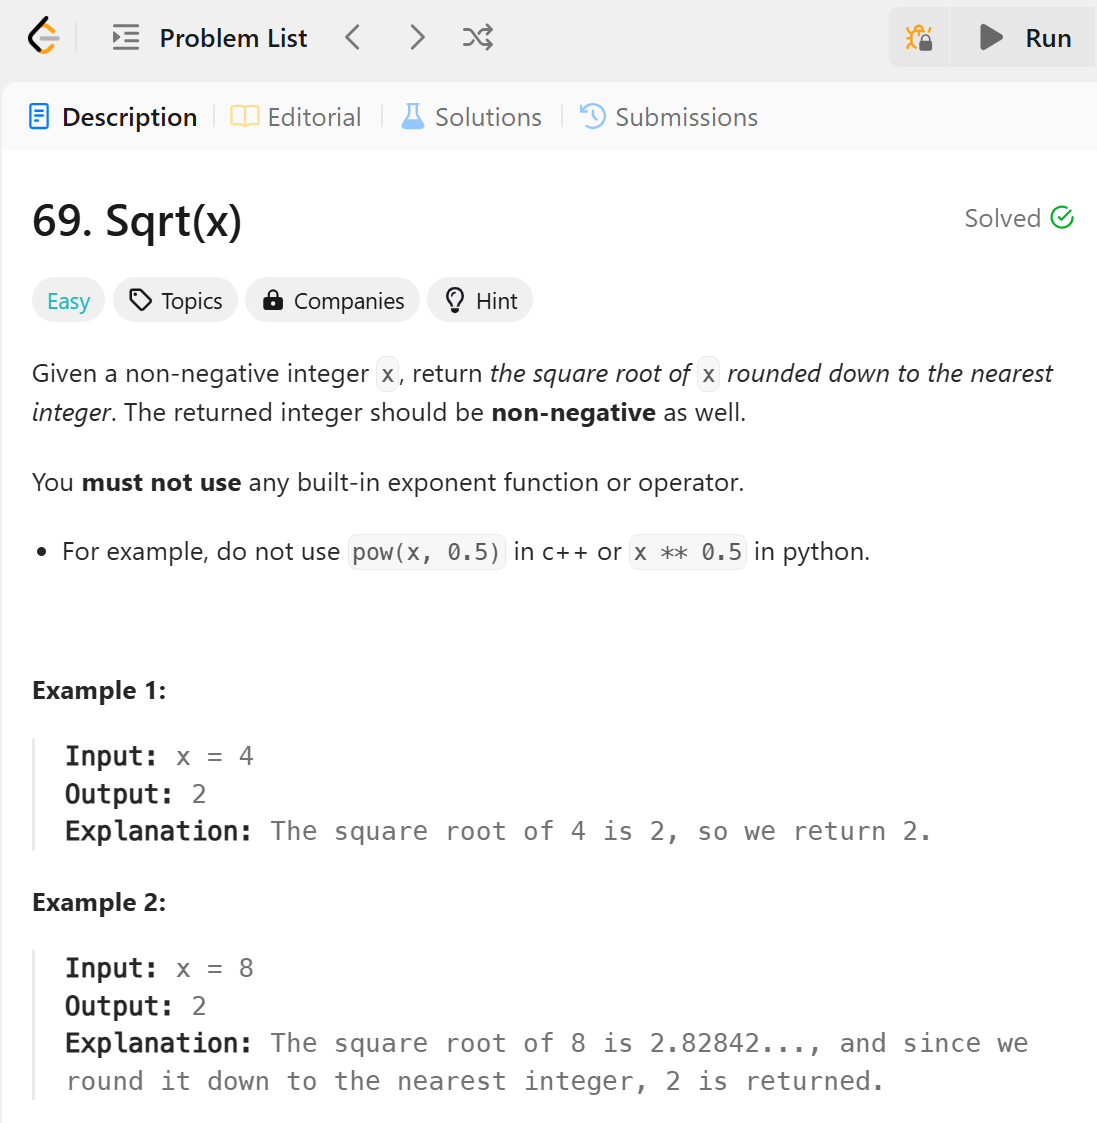

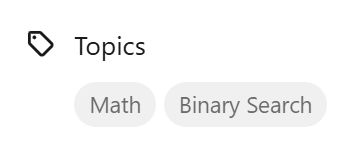

**69. Sqrt(x)**

Given a non-negative integer $x$, return the square root of $x$ rounded down to the nearest integer. The returned integer should be **non-negative** as well.

You **must not use** any built-in exponent function or operator.
- For example, do not use:


```
pow(x, 0.5) in C++
x ** 0.5 in Python
```

#Submission to LeetCode: codes

In [1]:
# Leetcode question 69: sqrt(x)

class Solution(object):
    def mySqrt(self, integer):
        """
        :type x: int
        :rtype: int
        """

        # Helper function to approximate the largest integer root.
        def approximateLargestIntegerRoot(integer):
            if integer == 0:
                return 0

            stringFormat = str(integer)  # Convert integer to string. Time complexity is O(1)
            length = len(stringFormat)   # Get the length of the string. O(1), as len(array) calls an attribute of this array

            if length == 1:
                return [0, 3]  # For single-digit integers, return a fixed range. O(1)

            quotient = length // 2  # Calculate half the length. O(1)

            endIndex1 = 1
            count = 1
            adjustment = 3.1

            # Compute an approximate range for the square root
            # see attached picture for more explanation
            while count <= quotient:
                endIndex1 = endIndex1 * 10  # Multiply by 10 for each digit pair
                count = count + 1

            if length % 2 == 0:
                return [int(endIndex1 / 10 * adjustment), endIndex1]  # Adjust and return range
            elif length % 2 == 1:
                adjustment = 3.2
                return [endIndex1, int(endIndex1 * adjustment)]

        ## main function starts here
        if integer == 0:
            return 0

        # Get the initial boundary for binary search
        boundary = approximateLargestIntegerRoot(integer)

        lower = boundary[0]
        upper = boundary[1]

        if lower == upper:
            return int(lower)  # Return if both boundaries are the same

        # Perform binary search
        while True:
            mid_lower = int((lower + upper) / 2)
            mid_upper = round((lower + upper) / 2)

            if lower * lower <= integer < mid_lower * mid_lower:
                upper = mid_lower  # Adjust upper boundary
            elif mid_lower * mid_lower <= integer < mid_upper * mid_upper:
                lower = mid_lower
                upper = mid_upper  # Adjust both boundaries
            elif mid_upper * mid_upper <= integer < upper * upper:
                lower = mid_upper  # Adjust lower boundary
            elif integer == upper * upper:
                return upper  # Return if exact match found

            if lower + 1 == upper:
                return int(lower)  # Return if boundaries converge

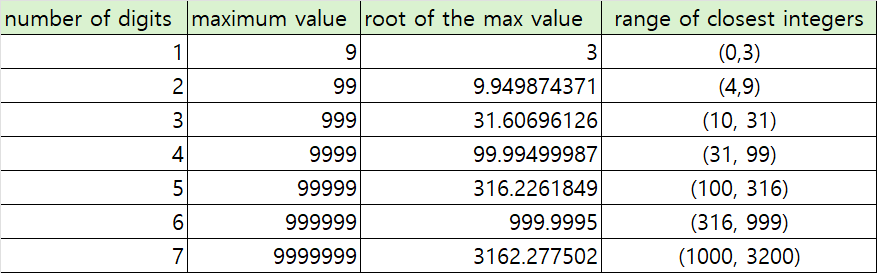

#Explanations:

1. **approximateLargestIntegerRoot**: This helper function approximates the range within which the square root of the given integer might lie.

  - Converts the integer to a string to easily get its length.
  - For single-digit integers, it returns a fixed range.
  - For multi-digit integers, it uses the length to determine a rough range for the square root.

2. **Binary Search**: The main function uses binary search within the approximated range to find the square root.

  - Adjusts the lower and upper boundaries based on the square of the midpoints.

  - The loop continues until the boundaries converge, at which point the lower boundary is returned as the integer square root.

#Testing:

In [2]:
# Input: an integer x
# Example:
# Input: 8
# Output: 2
# Explanation: The square root of 8 is approximately 2.82842, so the integer part is 2.
solution = Solution()

result = solution.mySqrt(8)
print(result)

2


In [3]:
# check
def checkSqrt(endPoint):
  solution = Solution()
  for integer in range(endPoint+1):
    print(f'Checking {integer} / {endPoint}. {integer / endPoint *100} %')
    if solution.mySqrt(integer) != int(integer ** 0.5):
      print(f'Fix: {integer}')
      break
    if integer == endPoint:
      print(f"Success! until {integer}")

In [4]:
checkSqrt(1000)

Checking 0 / 1000. 0.0 %
Checking 1 / 1000. 0.1 %
Checking 2 / 1000. 0.2 %
Checking 3 / 1000. 0.3 %
Checking 4 / 1000. 0.4 %
Checking 5 / 1000. 0.5 %
Checking 6 / 1000. 0.6 %
Checking 7 / 1000. 0.7000000000000001 %
Checking 8 / 1000. 0.8 %
Checking 9 / 1000. 0.8999999999999999 %
Checking 10 / 1000. 1.0 %
Checking 11 / 1000. 1.0999999999999999 %
Checking 12 / 1000. 1.2 %
Checking 13 / 1000. 1.3 %
Checking 14 / 1000. 1.4000000000000001 %
Checking 15 / 1000. 1.5 %
Checking 16 / 1000. 1.6 %
Checking 17 / 1000. 1.7000000000000002 %
Checking 18 / 1000. 1.7999999999999998 %
Checking 19 / 1000. 1.9 %
Checking 20 / 1000. 2.0 %
Checking 21 / 1000. 2.1 %
Checking 22 / 1000. 2.1999999999999997 %
Checking 23 / 1000. 2.3 %
Checking 24 / 1000. 2.4 %
Checking 25 / 1000. 2.5 %
Checking 26 / 1000. 2.6 %
Checking 27 / 1000. 2.7 %
Checking 28 / 1000. 2.8000000000000003 %
Checking 29 / 1000. 2.9000000000000004 %
Checking 30 / 1000. 3.0 %
Checking 31 / 1000. 3.1 %
Checking 32 / 1000. 3.2 %
Checking 33 / 100

#Submission succes

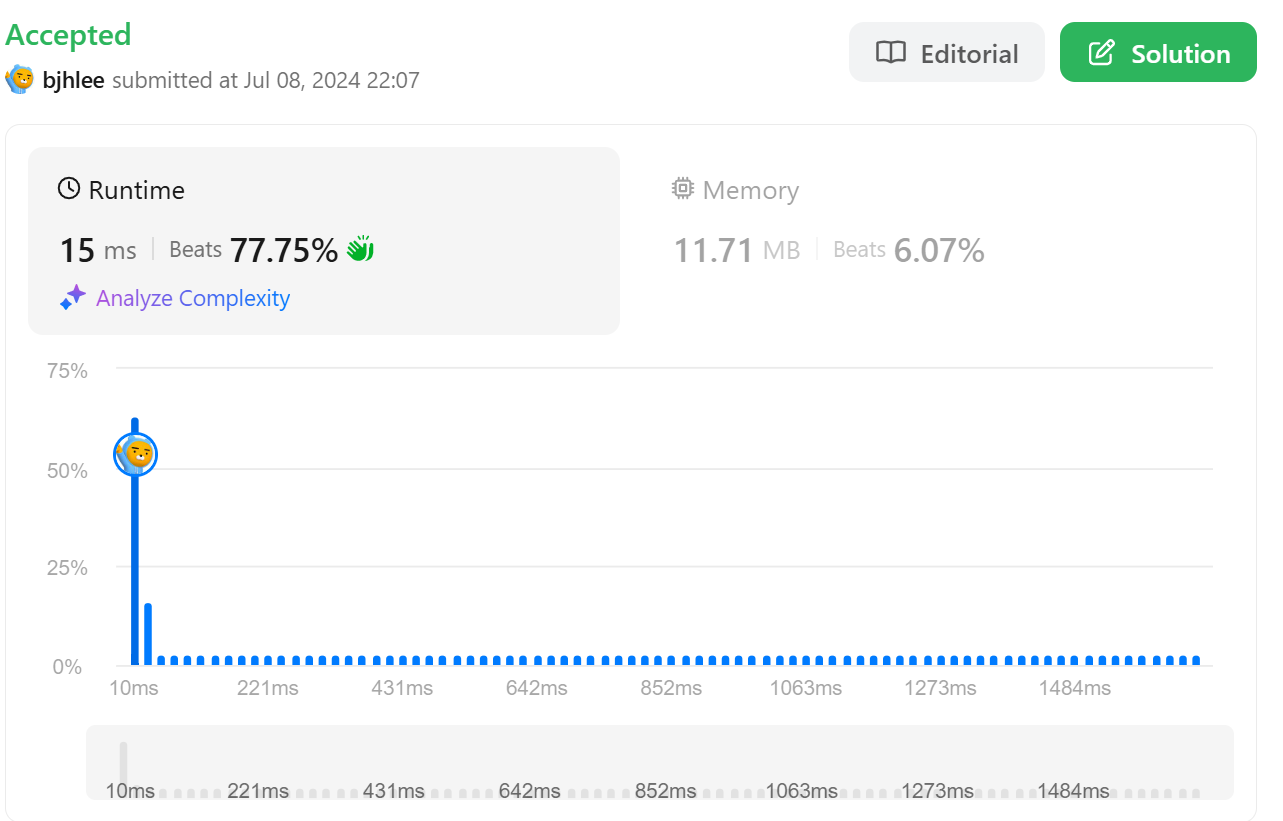

#Analysis: time complexity

**1. approximateLargestIntegerRoot Function:**

- Conversion to string (str(integer)): This operation has a time complexity of
O($\log(n)$) because the number of digits in an integer n is proportional to $\log_{10}(n)$.

- Length Calculation (len(stringFormat)): This is an O(1) operation since the length of a string is stored as an attribute in Python.

- Loop for approximation: The loop runs length // 2 times, which is O(logn) because the length of the integer in digits is $\log_{10}(n)$.


- Overall, the time complexity of the approximateLargestIntegerRoot function is O(logn).


**2. Binary Search in mySqrt Function:**

- The binary search operates within the range determined by the approximateLargestIntegerRoot function.

- The search space is between lower and upper, which is an approximate range around $\sqrt{n}$.

- Binary search has a time complexity of O(logn).


##Therefore, the overall time complexity of the mySqrt function is:

- O(logn) for the approximateLargestIntegerRoot function.

- O(logn) for the binary search.

- Combining these, the total time complexity is O(logn)+O(logn), which simplifies to O(logn).

# Lesson learned

1. (From the previously solved method using brute-force): Brute-force method is almost always tempting. But, is there a more efficient method? Let's try to discover it.

# Intuition: binary search
graphic source: geeks for geeks

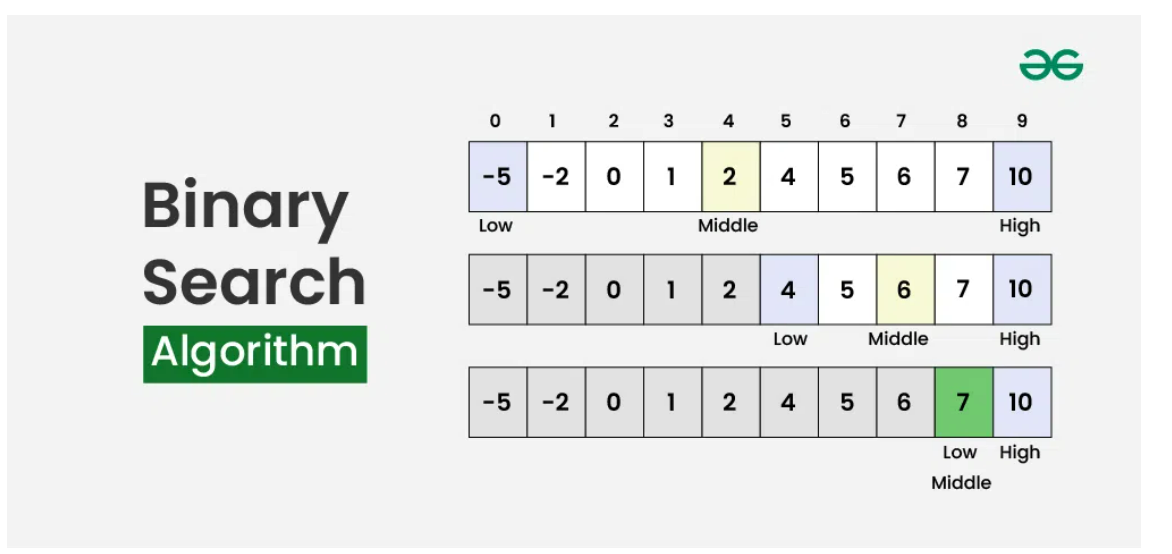